In [44]:
pip install missingno

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from google.cloud import bigquery
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [46]:
%%bigquery data
SELECT *
FROM corebigenai.demos.productos;

Query is running:   0%|          |

Downloading:   0%|          |

In [47]:
data

,int64_field_0,date,prod_id,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_icon,prod_source,source_type
0,6108,20190609,7501008611135,ron bacardi añejo,ron bacardi añejo x 750 ml,bacardi,supermercado,vinos y licores,ron,41990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1
1,7372,20190709,7501008611135,ron bacardi añejo,ron a ejo bacardi x 750ml,bacardi,supermercado,vinos y licores,ron,40900.0,unidades,../icons/SVG/73-drink/whiskey.svg,amarillo,1
2,7379,20190709,7501008611135,ron bacardi añejo,ron bacardi limon botella x 750 ml,bacardi,supermercado,vinos y licores,ron,40900.0,unidades,../icons/SVG/73-drink/whiskey.svg,amarillo,1
3,7561,20190709,7501008611135,ron bacardi añejo,ron big apple bacardi x 750ml,bacardi,supermercado,vinos y licores,ron,46550.0,unidades,../icons/SVG/73-drink/whiskey.svg,amarillo,1
4,14142,20190709,7501008611135,ron bacardi añejo,ron bacardi añejo x 750 ml,bacardi,supermercado,vinos y licores,ron,41990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25633,9300,20190709,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,24990.0,unidades,../icons/SVG/74-food/steak.svg,verde,1
25634,15753,20191101,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,19992.0,unidades,../icons/SVG/74-food/steak.svg,verde,1
25635,21202,20200220,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,25990.0,unidades,../icons/SVG/74-food/steak.svg,verde,1
25636,1358,20190609,7709087446444,salchicha la factoría pimienta hierbas + queso...,salchicha la factoría pimienta hierbas + queso...,la factoria,supermercado,charcutería,carnes frías maduradas y ahumadas,19590.0,unidades,../icons/SVG/74-food/steak.svg,verde,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25638 entries, 0 to 25637
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   int64_field_0    25638 non-null  Int64  
 1   date             25638 non-null  Int64  
 2   prod_id          25638 non-null  Int64  
 3   prod_name        25506 non-null  object 
 4   prod_name_long   25638 non-null  object 
 5   prod_brand       25586 non-null  object 
 6   category         25638 non-null  object 
 7   subcategory      25638 non-null  object 
 8   tags             25638 non-null  object 
 9   prod_unit_price  25633 non-null  float64
 10  prod_units       25231 non-null  object 
 11  prod_icon        25231 non-null  object 
 12  prod_source      25638 non-null  object 
 13  source_type      25638 non-null  Int64  
dtypes: Int64(4), float64(1), object(9)
memory usage: 2.8+ MB


In [49]:
data.describe()

,int64_field_0,date,prod_id,prod_unit_price,source_type
count,25638.0,25638.0,25638.0,2.563300e+04,25638.0
mean,12818.5,20192792.661167,7137051921720.850586,1.734393e+04,1.0
std,7401.197437,3867.260937,1872050933130.295898,1.047592e+05,0.0
min,0.0,20190609.0,5244812.0,0.000000e+00,1.0
25%,6409.25,20190609.0,7702010310031.5,4.190000e+03,1.0
50%,12818.5,20190709.0,7702177020357.0,7.390000e+03,1.0
75%,19227.75,20191101.0,7703616135809.0,1.399000e+04,1.0
max,25637.0,20200220.0,9333527429797.0,1.011905e+07,1.0


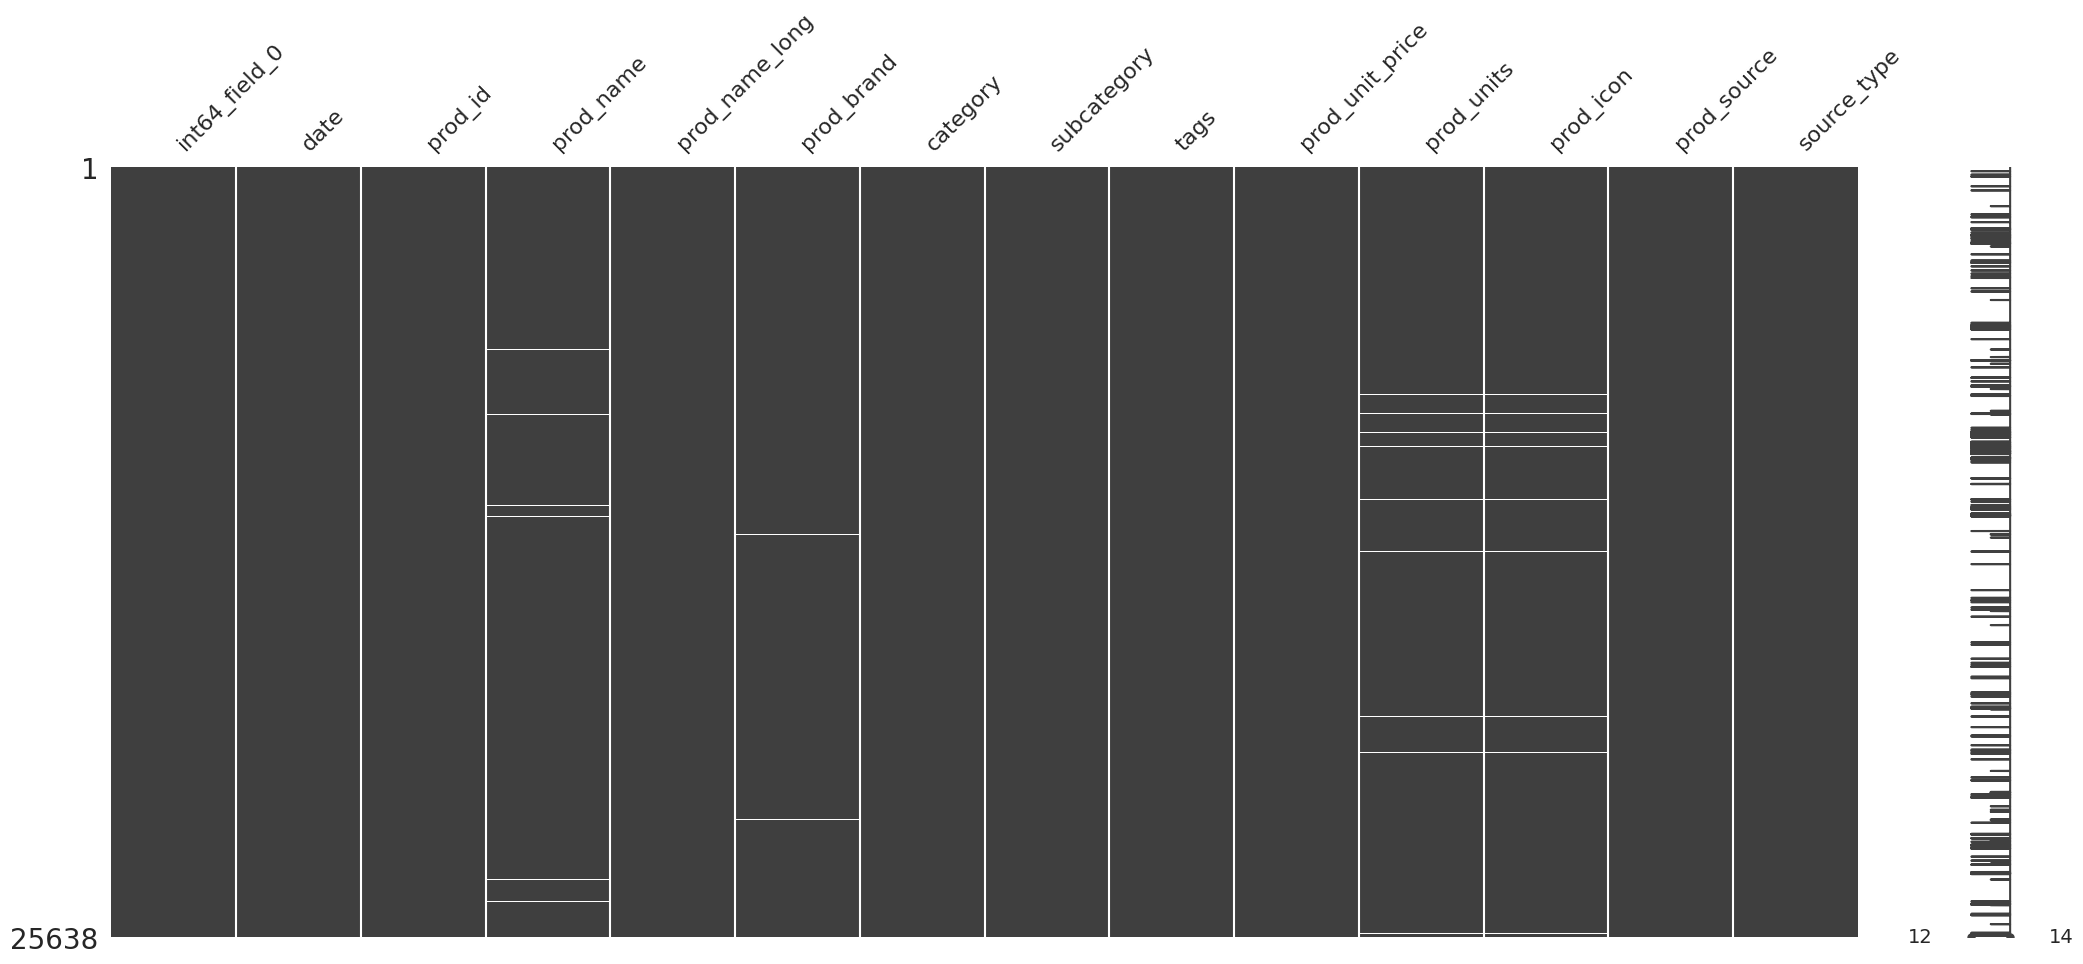

In [50]:
msno.matrix(data)
plt.show()

# Formatting correction

In [11]:
# prompt: I want to drop de decimal part and convert to integer the column date, after, we are going to have values like 20190609 where the format is yyyy/mm/dd, and I want at the end have that column in time formating

data['date'] = data['date'].astype(int)
data['date'] = data['date'].astype(str)
data['date'] = data['date'].str.slice(0,4) + '/' + data['date'].str.slice(4,6) + '/' + data['date'].str.slice(6,8)
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')


In [13]:
# prompt: I want to convert to int the column prod_id

data['prod_id'] = data['prod_id'].astype(int)


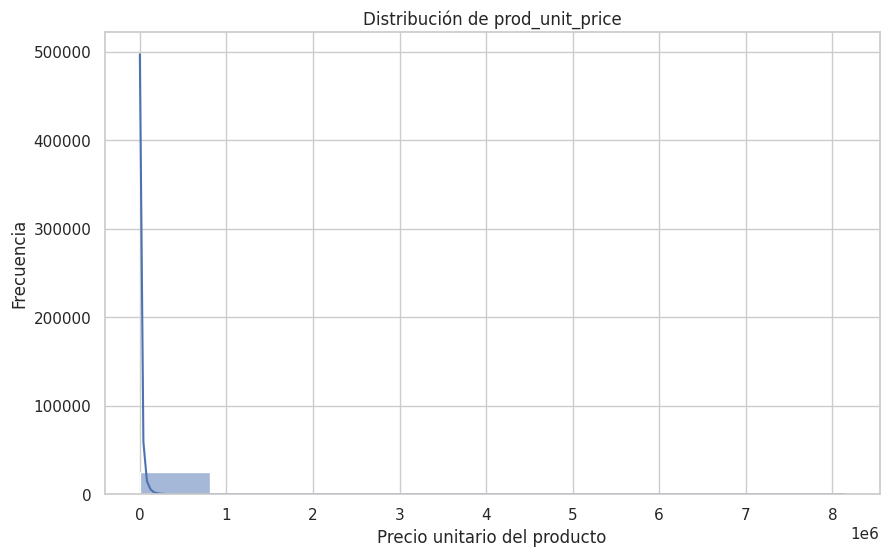

In [29]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de distribución para la columna 'prod_unit_price'
plt.figure(figsize=(10, 6))
sns.histplot(data['prod_unit_price'], kde=True, bins=10)

# Configurar los títulos y etiquetas
plt.title('Distribución de prod_unit_price')
plt.xlabel('Precio unitario del producto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


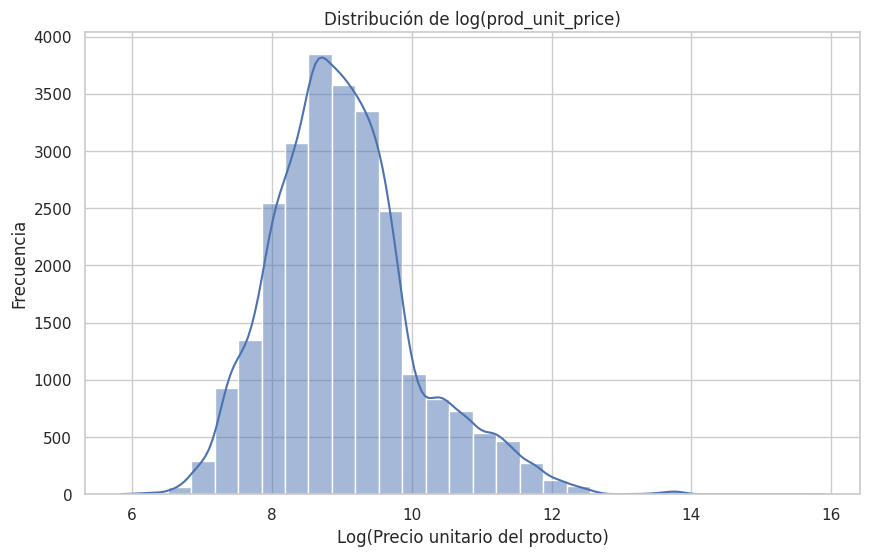

In [30]:
data['prod_unit_price'] = data['prod_unit_price'].replace(0, np.nan)
data = data.dropna(subset=['prod_unit_price'])

# Aplicar la transformación logarítmica
data['log_prod_unit_price'] = np.log(data['prod_unit_price'])

# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de distribución para la columna transformada 'log_prod_unit_price'
plt.figure(figsize=(10, 6))
sns.histplot(data['log_prod_unit_price'], kde=True, bins=30)

# Configurar los títulos y etiquetas
plt.title('Distribución de log(prod_unit_price)')
plt.xlabel('Log(Precio unitario del producto)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Filas antes de eliminar outliers: 25600
Filas después de eliminar outliers: 24834


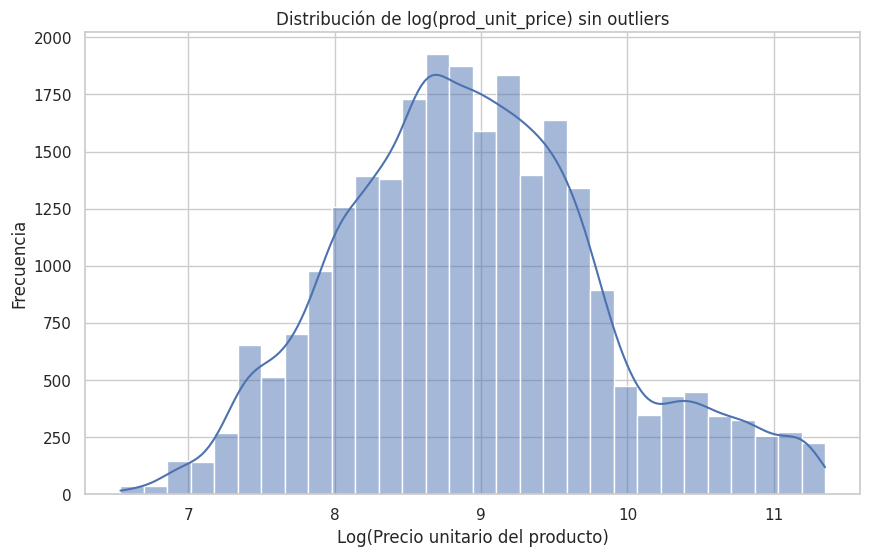

In [31]:
data = data.dropna(subset=['prod_unit_price'])

# Aplicar la transformación logarítmica
data['log_prod_unit_price'] = np.log(data['prod_unit_price'])

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = data['log_prod_unit_price'].quantile(0.25)
Q3 = data['log_prod_unit_price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
filtered_data = data[(data['log_prod_unit_price'] >= lower_bound) & (data['log_prod_unit_price'] <= upper_bound)]

# Verificar el número de filas antes y después de la eliminación de outliers
print(f"Filas antes de eliminar outliers: {data.shape[0]}")
print(f"Filas después de eliminar outliers: {filtered_data.shape[0]}")

# Crear un gráfico de distribución para la columna filtrada 'log_prod_unit_price'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['log_prod_unit_price'], kde=True, bins=30)

# Configurar los títulos y etiquetas
plt.title('Distribución de log(prod_unit_price) sin outliers')
plt.xlabel('Log(Precio unitario del producto)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [32]:
# Supongamos que ya tienes un DataFrame llamado data
# Calcular el primer y tercer cuartil
Q1 = data['prod_unit_price'].quantile(0.25)
Q3 = data['prod_unit_price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
data_cleaned = data[(data['prod_unit_price'] >= lower_bound) & (data['prod_unit_price'] <= upper_bound)]


In [33]:
data_cleaned

,int64_field_0,date,prod_id,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_icon,prod_source,source_type,log_prod_unit_price
20,6132,2019-06-09,7702168214000,ron viejo de caldas fco,ron viejo de caldas fco x 375 cc,viejo de caldas,supermercado,vinos y licores,ron,21990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1,9.998343
21,14166,2019-07-09,7702168214000,ron viejo de caldas fco,ron viejo de caldas fco x 375 cc,viejo de caldas,supermercado,vinos y licores,ron,21990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1,9.998343
22,19766,2019-11-01,7702168214000,ron viejo de caldas fco,ron viejo de caldas fco x 375 cc,viejo de caldas,supermercado,vinos y licores,ron,20990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1,9.951801
23,25230,2020-02-20,7702168214000,ron viejo de caldas fco,ron viejo de caldas fco x 375 cc,viejo de caldas,supermercado,vinos y licores,ron,20990.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1,9.951801
39,6119,2019-06-09,7702049101160,ron medellin añejo tetra,ron medellin añejo tetra x 260 ml,medellin,supermercado,vinos y licores,ron,11590.0,unidades,../icons/SVG/73-drink/whiskey.svg,verde,1,9.357898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25633,9300,2019-07-09,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,24990.0,unidades,../icons/SVG/74-food/steak.svg,verde,1,10.126231
25634,15753,2019-11-01,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,19992.0,unidades,../icons/SVG/74-food/steak.svg,verde,1,9.903087
25635,21202,2020-02-20,7707195246475,"mix madurados (lomo, salami, peperoni y serrano)","mix madurados (lomo, salami, peperoni y serran...",vilaseca,supermercado,charcutería,carnes frías maduradas y ahumadas,25990.0,unidades,../icons/SVG/74-food/steak.svg,verde,1,10.165467
25636,1358,2019-06-09,7709087446444,salchicha la factoría pimienta hierbas + queso...,salchicha la factoría pimienta hierbas + queso...,la factoria,supermercado,charcutería,carnes frías maduradas y ahumadas,19590.0,unidades,../icons/SVG/74-food/steak.svg,verde,1,9.882775


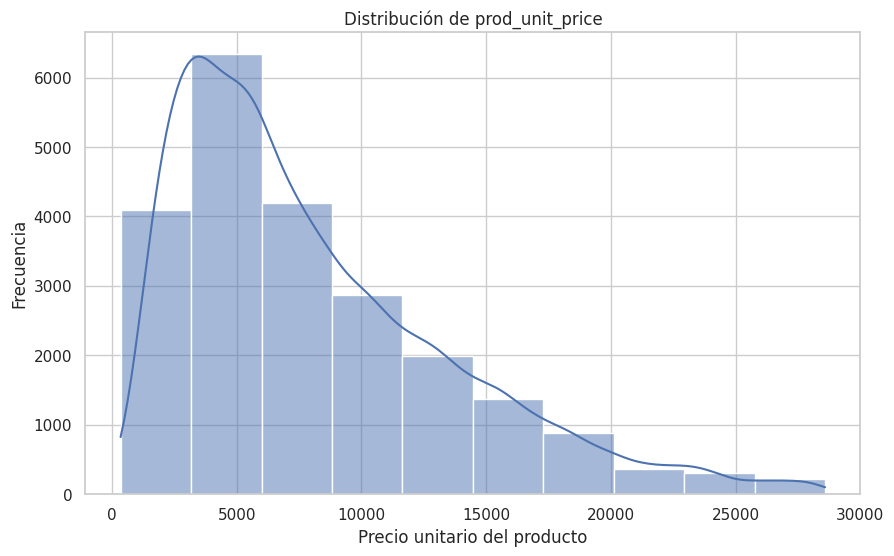

In [34]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de distribución para la columna 'prod_unit_price'
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['prod_unit_price'], kde=True, bins=10)

# Configurar los títulos y etiquetas
plt.title('Distribución de prod_unit_price')
plt.xlabel('Precio unitario del producto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# Categorical variables Analysis

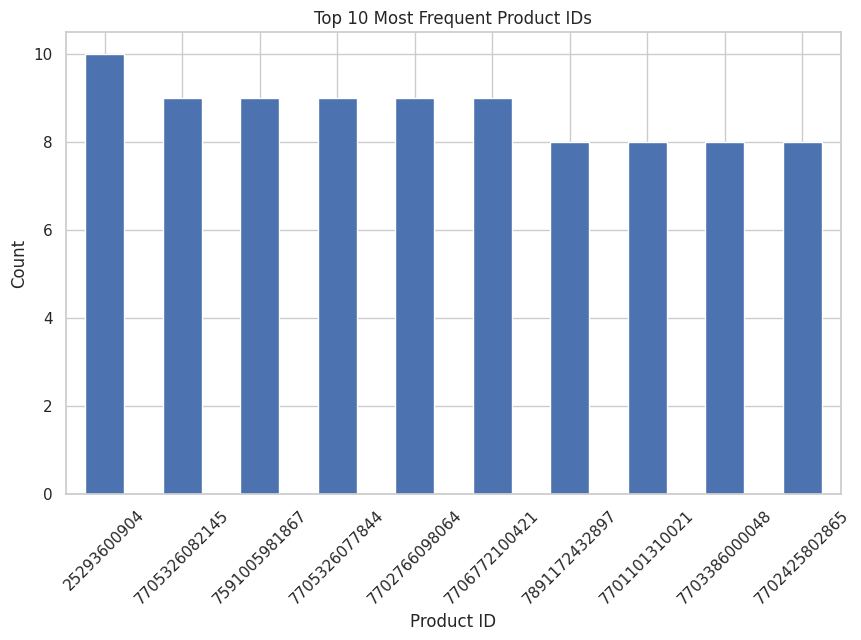

In [65]:
top_10_products = data_cleaned['prod_id'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Product IDs')
plt.xticks(rotation=45)
plt.show()

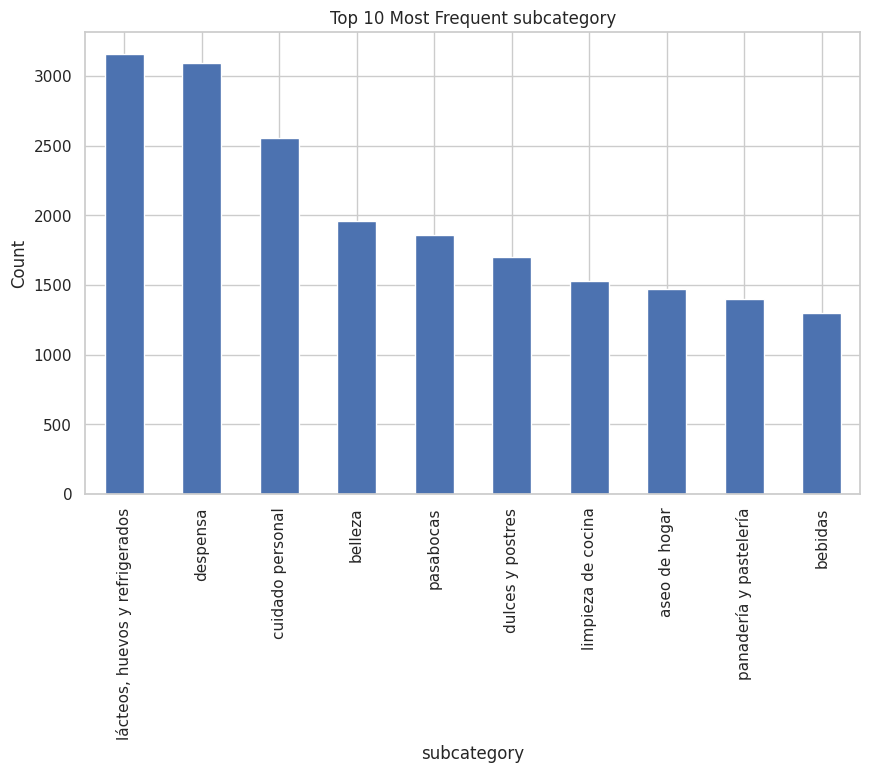

In [69]:
top_10_products = data_cleaned['subcategory'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('subcategory')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent subcategory')
plt.xticks(rotation=90)
plt.show()

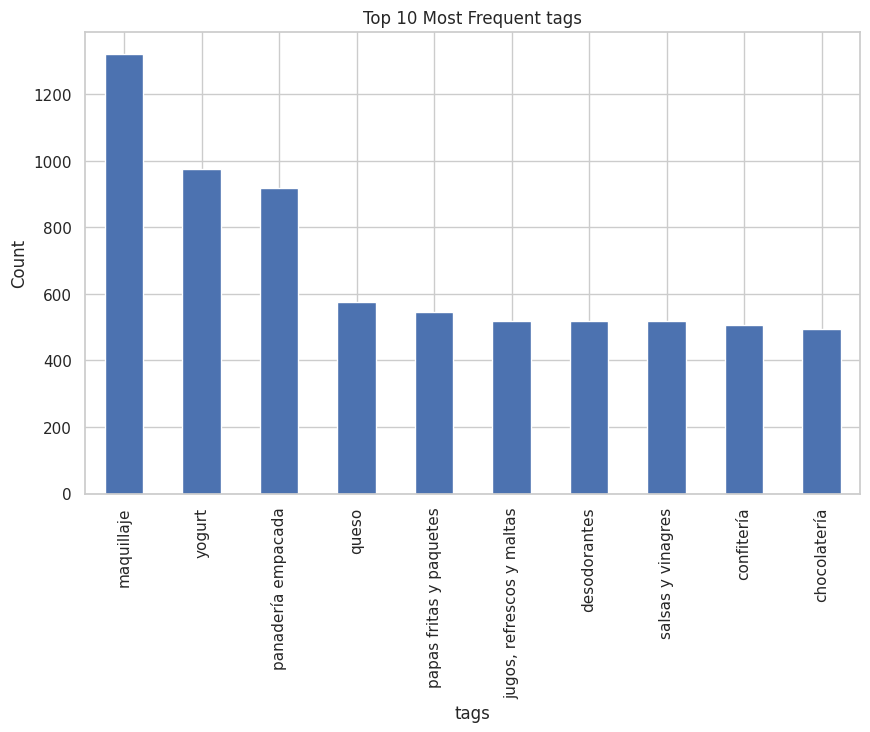

In [70]:
top_10_products = data_cleaned['tags'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('tags')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent tags')
plt.xticks(rotation=90)
plt.show()

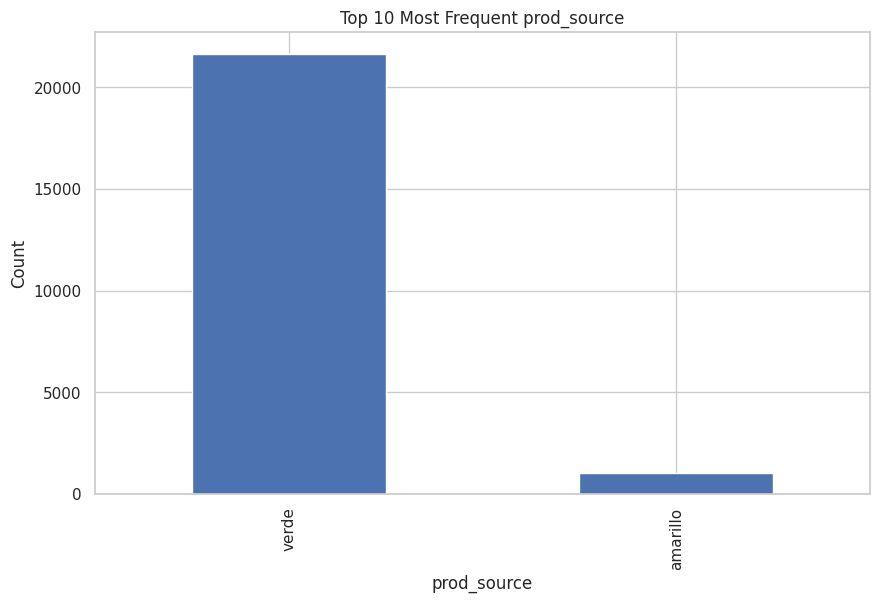

In [73]:
top_10_products = data_cleaned['prod_source'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('prod_source')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent prod_source')
plt.xticks(rotation=90)
plt.show()

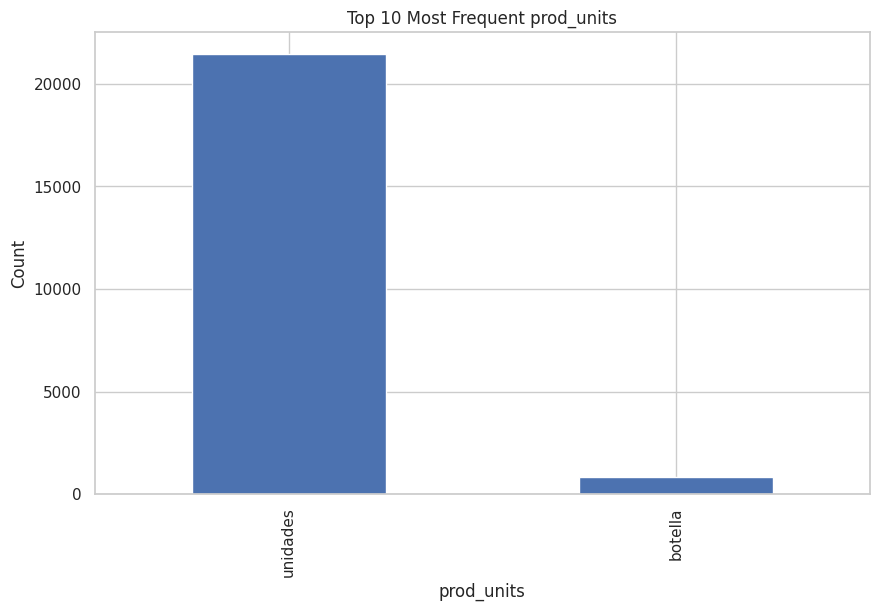

In [74]:
top_10_products = data_cleaned['prod_units'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('prod_units')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent prod_units')
plt.xticks(rotation=90)
plt.show()

# 2. Preprocessing and the data pipeline

In [56]:
%%bigquery data_clean
WITH quantiles AS (
  SELECT
    PERCENTILE_CONT(prod_unit_price, 0.25) OVER () AS Q1,
    PERCENTILE_CONT(prod_unit_price, 0.75) OVER () AS Q3
  FROM
    `corebigenai.demos.productos`
  LIMIT 1
),
iqr_bounds AS (
  SELECT
    Q1,
    Q3,
    (Q3 - Q1) AS IQR,
    (Q1 - 1.5 * (Q3 - Q1)) AS lower_bound,
    (Q3 + 1.5 * (Q3 - Q1)) AS upper_bound
  FROM
    quantiles
)
SELECT
  *
FROM
  `corebigenai.demos.productos` p
JOIN
  iqr_bounds b
ON
  p.prod_unit_price BETWEEN b.lower_bound AND b.upper_bound




Query is running:   0%|          |

Downloading:   0%|          |

In [57]:
data_clean

,int64_field_0,date,prod_id,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_icon,prod_source,source_type,Q1,Q3,IQR,lower_bound,upper_bound
0,8391,20190709,7702609005129,agua manantial,agua manantial x 1.5 l,manantial,supermercado,bebidas,agua,3390.0,botella,../icons/SVG/73-drink/bottle-2.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
1,8120,20190709,7702377005857,cera amarilla bufalo cojin,cera amarilla bufalo cojin x 700 ml,bufalo,supermercado,aseo de hogar,cera,8390.0,unidades,../icons/SVG/58-beauty-spas/cream.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
2,149,20190609,7702377012695,limpiador pisos madera búfalo,limpiador pisos madera búfalo x 600ml,bufalo,supermercado,aseo de hogar,cera,6153.0,unidades,../icons/SVG/58-beauty-spas/cream.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
3,14463,20190709,7804313112329,vino segu olle tinto,vino segu olle tinto x 1 litro,segu olle,supermercado,vinos y licores,vino,17990.0,botella,../icons/SVG/73-drink/wine-bottle-sparkling.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
4,25514,20200220,7702450022016,vino tinto isabella valle alto cauca,vino tinto isabella valle alto cauca x 750ml,isabella,supermercado,vinos y licores,vino,21990.0,botella,../icons/SVG/73-drink/wine-bottle-sparkling.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22657,22672,20200220,7702354946111,mezcla suntea te frio manzana verde polvo,mezcla suntea te frio manzana verde polvo x 266g,suntea,supermercado,despensa,"té, infusiones e instantáneos",6590.0,unidades,../icons/SVG/73-drink/tea-pot-1.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
22658,13297,20190709,8410376042498,galletas dietnature desayuno gullon,galletas dietnature desayuno gullon x 6unds x ...,gullon,supermercado,pasabocas,galletas dietéticas y saludables,8990.0,unidades,../icons/SVG/74-food/cookie.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
22659,19011,20191101,7702025121700,galleta con avena y trozos de chocolate,galleta con avena y trozos de chocolate x 156 g.,tosh,supermercado,pasabocas,galletas dietéticas y saludables,5190.0,unidades,../icons/SVG/74-food/cookie.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0
22660,19050,20191101,7702024059134,galletas saladas con cereal integral fitness,galletas saladas con cereal integral fitness x...,fitness,supermercado,pasabocas,galletas dietéticas y saludables,2814.0,unidades,../icons/SVG/74-food/cookie.svg,verde,1,4190.0,13990.0,9800.0,-10510.0,28690.0


#3 Text to SQL (Machine learning model evaluation)

In [78]:
!pip install --upgrade google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.57.0
    Uninstalling google-cloud-aiplatform-1.57.0:
      Successfully uninstalled google-cloud-aiplatform-1.57.0


In [80]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models

def generate(prompt):
    vertexai.init(project="corebigenai", location="us-central1")
    model = GenerativeModel(
      "gemini-1.0-pro-001",
    )
    text1 = f"""Consider a table called `corebigenai.demos.productos`
    with schema as described below.
    Column name   Description   type
    prod_id      Codigo del Producto (Numero de Producto que identifica el producto)
    prod_name      Nombre del producto (Todo en letra minuscula)
    prod_name_long      Descripcion del producto (Todo en letra minuscula)
    prod_brand     Marca del producto (Todo en letra minuscula)
    subcategory    Categoria del producto (Todo en letra minuscula)
    tags       Etqiquetas del producto (Todo en letra minuscula)
    prod_unit_price      Precio unitario del producto
    prod_units   Tipo de unidades del producto (Todo en letra minuscula)
    prod_source  Proveedor o Fabricante (Todo en letra minuscula)

    Use always lowercase for the words in the description of the product.
    Always separe each word with \"OR\" SQL Sentence about product description in the query for have best results.
    prod_id is alwasy a number.
    As data analysis expert, please write a SQL query in bigquery and use always the SQL comands LIKE with OR for each main word, and always LIMIT 10
    about the next request: {prompt}"""
    responses = model.generate_content(
        [text1],
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=True,
    )

    for response in responses:
      print(response.text, end="")



generation_config = {
    "max_output_tokens": 2048,
    "temperature": 0.2,
    "top_p": 1,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

In [81]:
generate("Cual es el producto mas costoso")

```sql
SELECT
  prod_name,
  prod_unit_price
FROM `corebigenai.demos.productos`
ORDER BY
  prod_unit_price DESC
LIMIT 10;
```

In [82]:
%%bigquery test1
SELECT
  prod_name,
  prod_unit_price
FROM `corebigenai.demos.productos`
ORDER BY
  prod_unit_price DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

In [83]:
test1

,prod_name,prod_unit_price
0,queso semimaduro feta cheese,10119047.0
1,queso porvolone alpina,8138823.0
2,queso emmental colanta,7038695.0
3,queso monterrey jack,4838888.0
4,gelatina colanta uva,990000.0
5,gelatina colanta fresa,990000.0
6,gelatina colanta uva,990000.0
7,gelatina colanta fresa,990000.0
8,bolsa neegra para papelera home care 48,990000.0
9,gelatina colanta twisty mora,990000.0
